<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/epileptic_seizure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [296]:
import io
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

In [286]:
uploads=files.upload()


Saving epileptic.csv to epileptic (2).csv


In [297]:

df= pd.read_csv(io.BytesIO(uploads['epileptic.csv']),encoding='windows-1252')
df.head()

,id,b,abnormality,mas,c,d,e,f,g,exudates,i,j,k,l,m,n,o,p,q,r,y
0,1,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,2,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,3,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,4,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,5,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


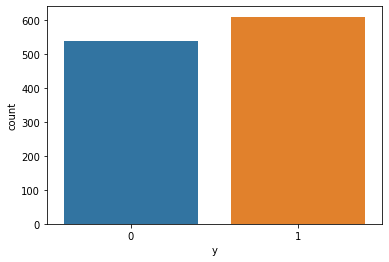

In [298]:
sns.countplot(df['y'],label='epileptic')


In [367]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=df.iloc[:,1:20]
#sns.heatmap(x.corr())
y=df.iloc[:,20]
del x['b']
del x['d']
del x['f']
del x['g']


In [368]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,test_size=30)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_tst=sc.fit_transform(x_tst)


In [351]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 15)
#x_tr = pca.fit_transform(x_tr)
#x_tst = pca.transform(x_tst)  
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)


In [369]:
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [387]:
model=Sequential()
model.add(Dense(units=25,activation='relu',input_dim=15))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=13,activation='relu'))
model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

In [388]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [389]:
model.fit(x_tr,y_tr,batch_size=100,epochs=150)

Epoch 1/150
12/12 [==============================] - 1s 2ms/step - loss: 0.6976 - accuracy: 0.4737
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.5112
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5415
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5468
Epoch 5/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.5504
Epoch 6/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.5611
Epoch 7/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.5781
Epoch 8/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.6236
Epoch 9/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6162 - accuracy: 0.6566
Epoch 10/150
12/12 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6806
Epoch 11/

In [390]:
y_pred=model.predict(x_tst)
y_pred=  (y_pred>0.5)
y_trpred=model.predict(x_tr)
y_trpred=  (y_trpred>0.5)


In [391]:
from sklearn.metrics import confusion_matrix,classification_report
conf_mat=confusion_matrix(y_tst,y_pred)
print(conf_mat)
conf_mat1=confusion_matrix(y_tr,y_trpred)
print(conf_mat1)

[[15  3]
 [ 3  9]]
[[452  70]
 [110 489]]


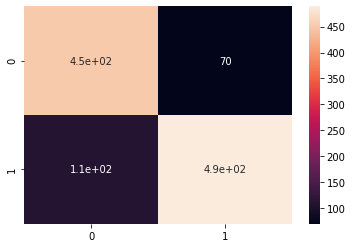

In [392]:
sns.heatmap(conf_mat1,annot=True)
plt.savefig('epilepticmatrix.png')

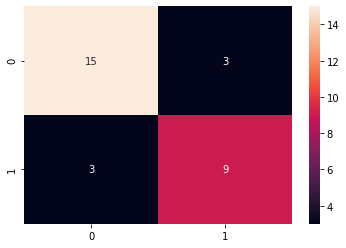

In [393]:
sns.heatmap(conf_mat,annot=True)
plt.savefig('epilepticmatrix1.png')

In [394]:
report=classification_report(y_tr,y_trpred)
print('Classification report for trained data')
print(report)
print('classification report for test data')
report=classification_report(y_tst,y_pred)
print(report)

Classification report for trained data
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       522
           1       0.87      0.82      0.84       599

    accuracy                           0.84      1121
   macro avg       0.84      0.84      0.84      1121
weighted avg       0.84      0.84      0.84      1121

classification report for test data
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30

